In [1]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers.core import Dropout, Flatten, Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import matplotlib.pyplot as plt

Using TensorFlow backend.
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
DEV = False
argvs = sys.argv
argc = len(argvs)

if argc > 1 and (argvs[1] == "--development" or argvs[1] == "-d"):
  DEV = True

if DEV:
  epochs = 2
else:
  epochs = 5

train_data_path = 'data/training'
validation_data_path = 'data/validation'

In [3]:
"""
Parameters
"""
img_width, img_height = 64, 64
batch_size = 32
samples_per_epoch = 240
validation_steps = 40
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 2
lr = 0.001

In [4]:
model = Sequential()
model.add(Convolution2D(nb_filters1, (conv1_size, conv1_size), border_mode ="same", input_shape=(img_width, img_height,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., padding="same")`
  


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 264 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
"""
Tensorboard log
"""
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

history = model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=5, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=40, steps_per_epoch=7)`
  





Epoch 1/5
7/7 [==============================] - 67s 10s/step - loss: 2.5194 - accuracy: 0.5134 - val_loss: 0.4232 - val_accuracy: 0.8000

Epoch 2/5
7/7 [==============================] - 38s 5s/step - loss: 0.6344 - accuracy: 0.6648 - val_loss: 0.4433 - val_accuracy: 0.8500
Epoch 3/5
7/7 [==============================] - 36s 5s/step - loss: 0.4957 - accuracy: 0.7900 - val_loss: 0.3332 - val_accuracy: 0.9500
Epoch 4/5
7/7 [==============================] - 33s 5s/step - loss: 0.3795 - accuracy: 0.8438 - val_loss: 0.2275 - val_accuracy: 0.9500
Epoch 5/5
7/7 [==============================] - 28s 4s/step - loss: 0.4233 - accuracy: 0.8500 - val_loss: 0.2107 - val_accuracy: 0.8250


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [43]:
# actual values
actual = [0, 1, 0, 1,0,0] 
# predicted values
predicted = [1,0,0,1,0,1]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[1 1]
 [2 2]]
Outcome values : 
 1 1 2 2
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           0       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [36]:
train_generator.class_indices

{'corona': 0, 'normal': 1}

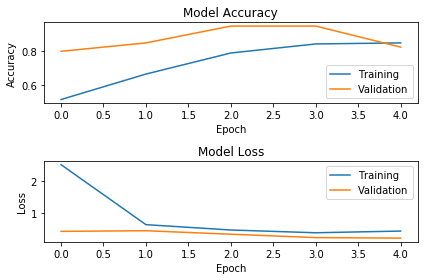

In [37]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right') 
   
 # summarize history for loss  
   
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()  

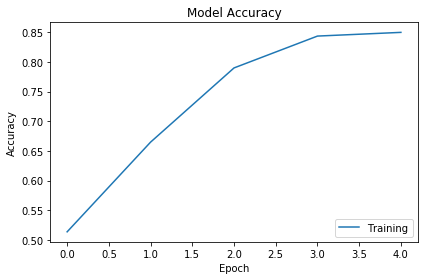

In [38]:
plt.subplot()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='lower right')

plt.tight_layout()

plt.show()  

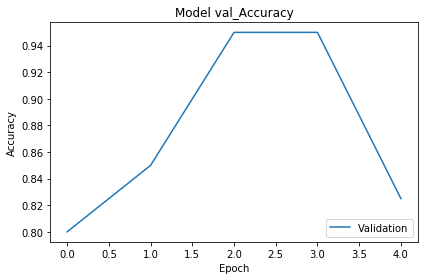

In [39]:
plt.plot(history.history['val_accuracy'])
plt.title('Model val_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='lower right')

plt.tight_layout()

plt.show()  

In [ ]:
plt.subplot()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper right')

plt.tight_layout()

plt.show()  

In [ ]:
plt.subplot()
plt.plot(history.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper right')

plt.tight_layout()

plt.show()  